### Importing Packages:

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

import plotly.offline as py

py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
import numpy as np
import re

In [11]:
pip install plotly==5.3.1

^C
Note: you may need to restart the kernel to use updated packages.


### Loading Data:

In [15]:
df = pd.read_csv('Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


### Exploratory Data Analysis:

In [16]:
# Product Scores
fig = px.histogram(df, x="Score")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Score')
fig.show()

In [18]:
pip install wordcloud 

Note: you may need to restart the kernel to use updated packages.


In [21]:
# get stopwords
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords as stopwords
# Create stopword list:
stopwords = set(stopwords.words('english'))

print(stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akint\AppData\Roaming\nltk_data...


{"shouldn't", 'of', 'll', "that'll", 'have', 'before', 'on', 'yourself', 'ain', 'too', "she's", 'through', 'been', 'shan', 'to', 'they', 'are', 'against', "weren't", 'very', 'wasn', 'mightn', 'what', 'in', 'between', 'nor', 'doesn', 'is', 'same', "shan't", 'am', 'did', 'out', 'having', 'over', 'where', 'the', 'your', 'into', 'couldn', 'he', "hadn't", 'it', 'only', 'further', 'y', 'few', 'ours', 'up', 'their', 'these', 'was', "doesn't", 'other', 'them', 'had', 'ourselves', 'while', 'own', 'our', 'myself', 'this', 'm', 'she', 'him', 'because', 'won', 'when', 'a', 'such', 'needn', 'being', 'my', 'should', 'that', 'but', 'with', 'above', 'now', "haven't", 'an', 'has', 'why', 'than', 't', 've', "aren't", 'do', 'any', 'don', 'hers', 'then', "isn't", "wasn't", 'you', 'and', 'some', 'i', 'not', 'shouldn', 'his', "wouldn't", 'themselves', "won't", "couldn't", 'once', 'who', 'about', 'can', 'so', "you're", 'hasn', 'those', "you've", 'will', 'all', 'yours', 'both', 'again', 'how', 'under', 'weren

[nltk_data]   Unzipping corpora\stopwords.zip.


In [22]:
# add some new words into stopwords
stopwords.update(["br", "href"])

print(stopwords)


{"shouldn't", 'of', 'll', "that'll", 'have', 'before', 'on', 'yourself', 'ain', 'too', "she's", 'through', 'been', 'shan', 'to', 'they', 'are', 'against', "weren't", 'very', 'wasn', 'mightn', 'what', 'in', 'between', 'nor', 'doesn', 'is', 'same', "shan't", 'am', 'did', 'out', 'having', 'over', 'where', 'the', 'your', 'into', 'couldn', 'he', "hadn't", 'it', 'only', 'further', 'y', 'few', 'ours', 'up', 'their', 'these', 'was', "doesn't", 'other', 'them', 'had', 'ourselves', 'while', 'own', 'br', 'our', 'myself', 'this', 'm', 'she', 'him', 'because', 'won', 'when', 'a', 'such', 'needn', 'being', 'my', 'should', 'that', 'but', 'with', 'above', 'now', "haven't", 'an', 'has', 'why', 'than', 't', 've', "aren't", 'do', 'any', 'href', 'don', 'hers', 'then', "isn't", "wasn't", 'you', 'and', 'some', 'i', 'not', 'shouldn', 'his', "wouldn't", 'themselves', "won't", "couldn't", 'once', 'who', 'about', 'can', 'so', "you're", 'hasn', 'those', "you've", 'will', 'all', 'yours', 'both', 'again', 'how', '

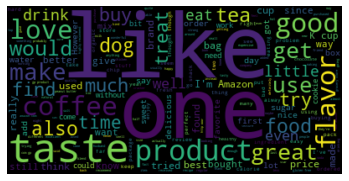

In [23]:
# WordClouds:
text = " ".join(review for review in df.Text)
wordcloud = WordCloud(stopwords=stopwords).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

### Classifying Tweets:

In [24]:
# assign reviews with score > 3 as positive sentiment
# score < 3 negative sentiment
# remove score = 3
df = df[df['Score'] != 3]
df['sentiment'] = df['Score'].apply(lambda rating : +1 if rating > 3 else 0)

In [25]:
### More Data Analysis:

In [26]:
# split df - positive and negative sentiment:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == 0]

In [27]:
# Checking for missing values for "Summary" column --> No NAN in Summary
positive.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15407 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      15407 non-null  int64 
 1   ProductId               15407 non-null  object
 2   UserId                  15407 non-null  object
 3   ProfileName             15407 non-null  object
 4   HelpfulnessNumerator    15407 non-null  int64 
 5   HelpfulnessDenominator  15407 non-null  int64 
 6   Score                   15407 non-null  int64 
 7   Time                    15407 non-null  int64 
 8   Summary                 15407 non-null  object
 9   Text                    15407 non-null  object
 10  sentiment               15407 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 1.4+ MB


In [28]:
# Checking the head of positive data

positive.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,1
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,1


In [29]:
# Checking for missing values
negative.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2944 entries, 1 to 19978
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      2944 non-null   int64 
 1   ProductId               2944 non-null   object
 2   UserId                  2944 non-null   object
 3   ProfileName             2944 non-null   object
 4   HelpfulnessNumerator    2944 non-null   int64 
 5   HelpfulnessDenominator  2944 non-null   int64 
 6   Score                   2944 non-null   int64 
 7   Time                    2944 non-null   int64 
 8   Summary                 2944 non-null   object
 9   Text                    2944 non-null   object
 10  sentiment               2944 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 276.0+ KB


In [30]:
# Checking the head of negative data

negative.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0
12,13,B0009XLVG0,A327PCT23YH90,LT,1,1,1,1339545600,My Cats Are Not Fans of the New Food,My cats have been happily eating Felidae Plati...,0
16,17,B001GVISJM,A3KLWF6WQ5BNYO,Erica Neathery,0,0,2,1348099200,poor taste,I love eating them and they are good for watch...,0
26,27,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,1,1332633600,Nasty No flavor,"The candy is just red , No flavor . Just plan...",0


# WordClouds - Positive Sentiment

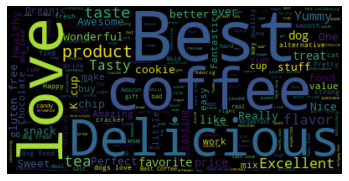

In [31]:
from nltk.corpus import stopwords as stopwords
stopwords = set(stopwords.words('english'))
stopwords.update(["br", "href","good","great"]) 
## good and great removed because they were included in negative sentiment
pos = " ".join(review for review in positive.Summary)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

# WordClouds - Negative Sentiment

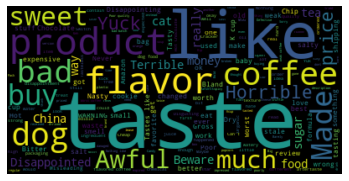

In [32]:
neg = " ".join(review for review in negative.Summary)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()

### Distribution of Reviews with Sentiment

In [33]:
df['sentimentt'] = df['sentiment'].replace({0 : 'negative'})
df['sentimentt'] = df['sentimentt'].replace({1 : 'positive'})
fig = px.histogram(df, x="sentimentt")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show()

In [34]:
# Data Cleaning:

In [35]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"'))
    return final
df['Text'] = df['Text'].apply(remove_punctuation)
df = df.dropna(subset=['Summary'])
df['Summary'] = df['Summary'].apply(remove_punctuation)

In [36]:
# Split the Dataframe

In [37]:
dfNew = df[['Summary','sentiment']]
dfNew.head()

,Summary,sentiment
0,Good Quality Dog Food,1
1,Not as Advertised,0
2,Delight says it all,1
3,Cough Medicine,0
4,Great taffy,1


In [38]:
# random split train and test data
index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

In [39]:
# Create Bag of Words

In [40]:
# count vectorizer:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['Summary'])
test_matrix = vectorizer.transform(test['Summary'])

In [42]:
# check the details of vectorizer
vectorizer.get_feature_names()

['0',
 '08',
 '081',
 '088',
 '1',
 '10',
 '100',
 '103',
 '105',
 '10am',
 '10lbs',
 '10mo',
 '10oz',
 '11',
 '11yr',
 '12',
 '125',
 '13',
 '135',
 '136',
 '14',
 '15',
 '1519',
 '16',
 '16oz',
 '17',
 '1748',
 '18',
 '180',
 '1800flowers',
 '181',
 '1866',
 '18lb',
 '18month',
 '19',
 '195oz',
 '1960',
 '1st',
 '2',
 '20',
 '2004',
 '2009',
 '2011',
 '2012',
 '20oz',
 '21',
 '219',
 '2199',
 '234',
 '24',
 '24qt',
 '25',
 '26',
 '2699',
 '28',
 '29g',
 '2nd',
 '2x',
 '2yr',
 '3',
 '30',
 '3000',
 '300th',
 '303',
 '338',
 '34g',
 '35',
 '350f',
 '35mg',
 '36',
 '36g',
 '3pkg',
 '3rd',
 '4',
 '400',
 '41',
 '44',
 '449',
 '44ct',
 '45',
 '4544',
 '46',
 '48khz',
 '4capsules',
 '4oz',
 '5',
 '50',
 '500f',
 '54oz',
 '5lb',
 '6',
 '60',
 '64',
 '65',
 '6oz',
 '7',
 '70',
 '79',
 '799',
 '8',
 '80',
 '83',
 '850',
 '9',
 '99',
 '9greenbox',
 'a',
 'a1',
 'aa',
 'aaaa',
 'aaaaahhh',
 'aaaarrrrrgggghhhhh',
 'aaah',
 'abby',
 'abc',
 'able',
 'about',
 'above',
 'absolute',
 'absolutel',
 

In [44]:
# check the details of vectorizer
vectorizer.get_feature_names()[1500:1510]

['dipped',
 'dipping',
 'dips',
 'direct',
 'directed',
 'directions',
 'directly',
 'dirt',
 'dirty',
 'disagree']

In [45]:
print(train_matrix[:4, 1500:1510].toarray())

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [27]:
# Import Logistic Regression

In [46]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [47]:
# Split target and independent variables

In [48]:
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

In [49]:
# Fit the Model

In [50]:
lr.fit(X_train,y_train)

LogisticRegression()

In [51]:
# Make Predictions

In [52]:
predictions = lr.predict(X_test)

In [53]:
# Testing

In [54]:
# find accuracy, precision, recall:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[ 318,   76],
       [ 295, 3210]], dtype=int64)

In [55]:
# The overall accuracy of the model on the test data is around 92%, 
# which is pretty good considering we didn’t do any feature extraction or much preprocessing.

print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.52      0.81      0.63       394
           1       0.98      0.92      0.95      3505

    accuracy                           0.90      3899
   macro avg       0.75      0.86      0.79      3899
weighted avg       0.93      0.90      0.91      3899

